In [1]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 KB

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries

In [3]:
df=pd.read_csv("/content/week_data.csv")
df.head()

,weeks,TE50011,TE50012,TE50013,TE50014,TE50015,TE50016,TE50017,TE50018,TE50019,...,TE50344,TE50345,TE50346,TE50347,TE50348,TE50349,TE50350,TE50351,TE50352,TE50353
0,1,20160,59400,0,0,770,0,216,3024,575000,...,0,0,0,0,0,0,0,0,0,0
1,2,20580,83700,3240,0,350,0,0,0,205000,...,0,0,0,0,4000,0,0,0,0,0
2,3,12180,118800,144,0,490,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,35280,135000,2040,1590,560,754,1247,4032,300000,...,0,1000,0,0,0,0,0,0,0,0
4,5,31360,27000,3312,400,1050,0,0,10080,0,...,0,12000,0,0,0,0,0,0,0,0


In [10]:
from statsmodels.tsa.stattools import adfuller
adftest=adfuller(df[0])
print(adftest)

KeyError: ignored

In [26]:
from datetime import datetime
pd.to_datetime(df['weeks'],infer_datetime_format=True)
df.head()

,weeks,TE50011,TE50012,TE50013,TE50014,TE50015,TE50016,TE50017,TE50018,TE50019,...,TE50344,TE50345,TE50346,TE50347,TE50348,TE50349,TE50350,TE50351,TE50352,TE50353
0,1,20160,59400,0,0,770,0,216,3024,575000,...,0,0,0,0,0,0,0,0,0,0
1,2,20580,83700,3240,0,350,0,0,0,205000,...,0,0,0,0,4000,0,0,0,0,0
2,3,12180,118800,144,0,490,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,35280,135000,2040,1590,560,754,1247,4032,300000,...,0,1000,0,0,0,0,0,0,0,0
4,5,31360,27000,3312,400,1050,0,0,10080,0,...,0,12000,0,0,0,0,0,0,0,0


In [29]:
df2=df.iloc[:,:2]
df2.head()

,weeks,TE50011
0,1,20160
1,2,20580
2,3,12180
3,4,35280
4,5,31360


In [30]:
pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### data split

In [33]:
series1 = TimeSeries.from_dataframe(df2, 'weeks', 'TE50011')

In [34]:
from darts.models import ExponentialSmoothing
from darts.datasets import AirPassengersDataset

train, val = series1[:-20], series1[-20:]

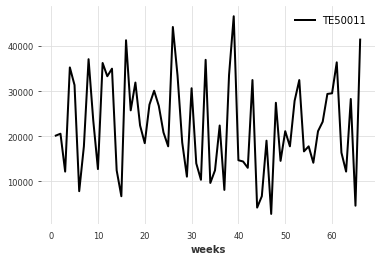

In [35]:
series1.plot()

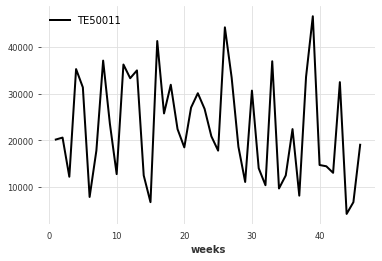

In [36]:
train.plot()

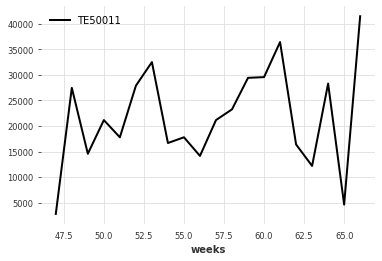

In [37]:
val.plot()

In [38]:
from darts.models import NBEATSModel

model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42)

model.fit(train, epochs=50, verbose=True);

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

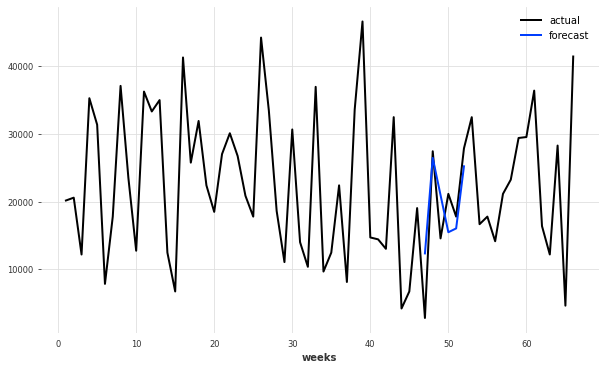

In [39]:
pred = model.predict(series=train, n=6)
plt.figure(figsize=(10, 6))
series1.plot(label="actual")
pred.plot(label="forecast")

# error metrics

In [40]:
from darts.metrics import mape
def eval_model(model):
    model.fit(train,epochs=50,verbose=True)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))

eval_model(NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

model <darts.models.forecasting.nbeats.NBEATSModel object at 0x7f2d361e90d0> obtains MAPE: 60.54%


In [41]:
from darts.metrics import r2_score
r2_score(series1, pred)

0.5992818506416997

# muti-model Evaluation

In [47]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))


eval_model(ExponentialSmoothing())
eval_model(TBATS())
eval_model(AutoARIMA())
eval_model(Theta())
eval_model(NBEATSModel(input_chunk_length=24, output_chunk_length=12, random_state=42))
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()
# eval_model()


model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 72.94%


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


model (T)BATS obtains MAPE: 76.89%
model Auto-ARIMA obtains MAPE: 83.08%


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


model Theta(2) obtains MAPE: 65.11%


INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

model <darts.models.forecasting.nbeats.NBEATSModel object at 0x7f2d32cad5b0> obtains MAPE: 60.32%
